In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\Githubupload\phising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [4]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [6]:
pd.crosstab(df['SFH'], df['Result'])

Result,-1,1
SFH,,
-1,4238,4202
0,263,498
1,397,1457


In [7]:
df['Result'].value_counts(dropna = False)

 1    6157
-1    4898
Name: Result, dtype: int64

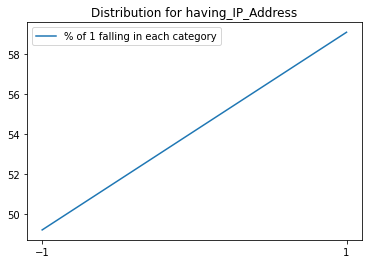

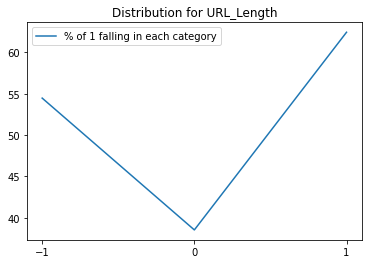

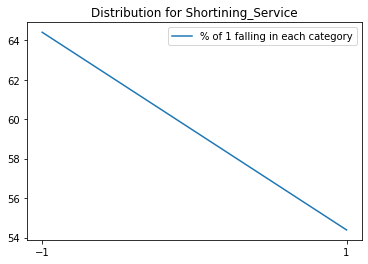

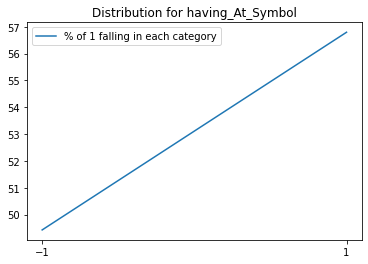

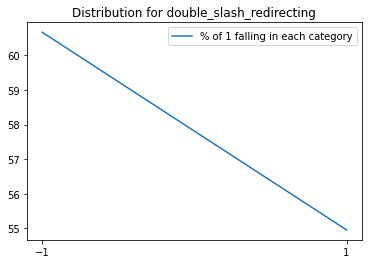

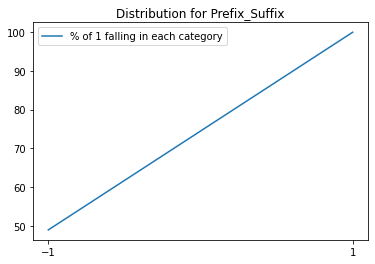

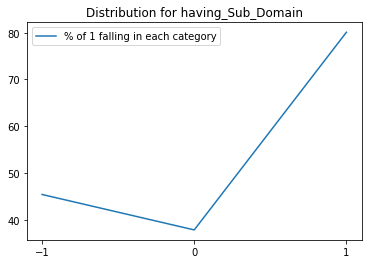

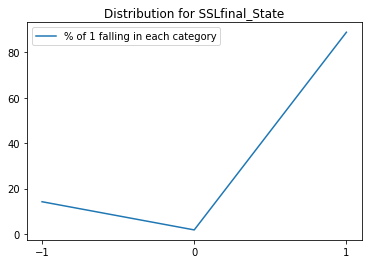

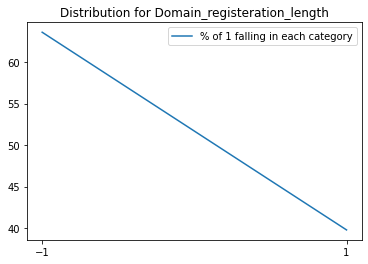

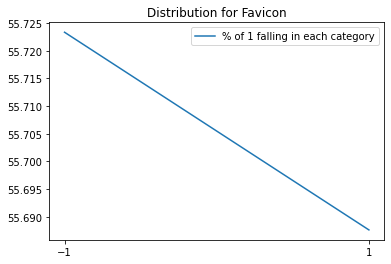

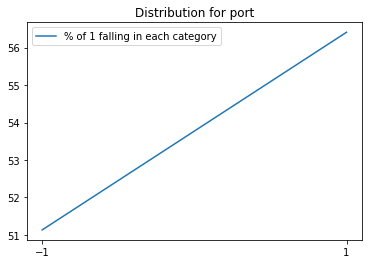

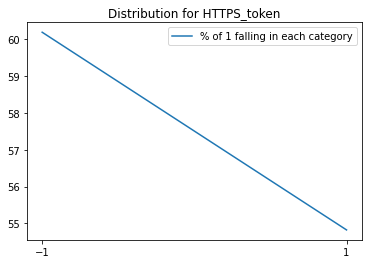

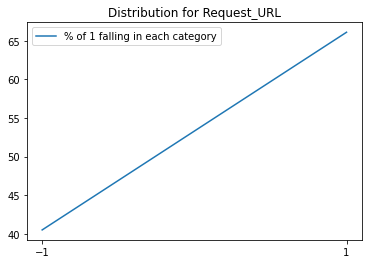

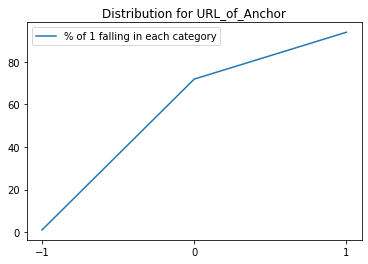

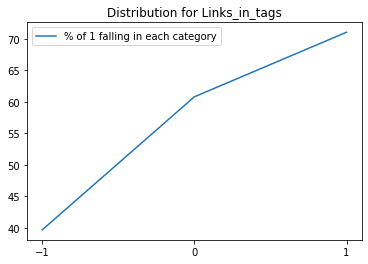

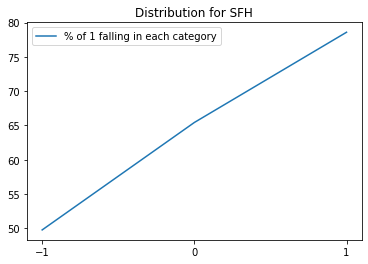

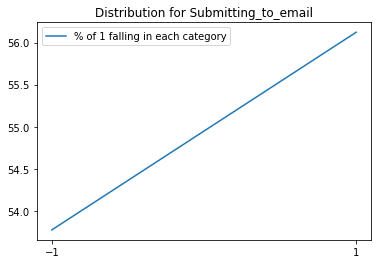

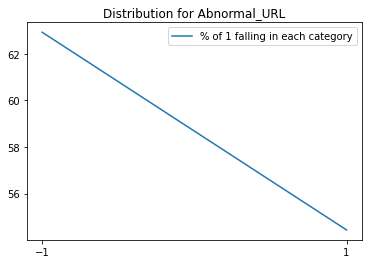

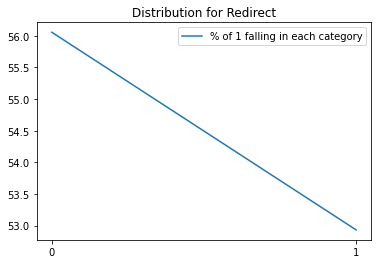

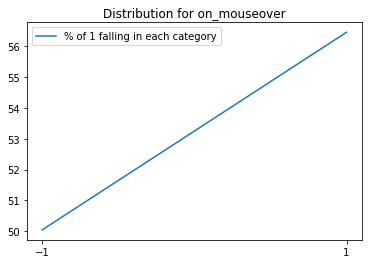

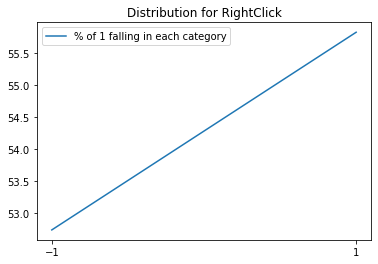

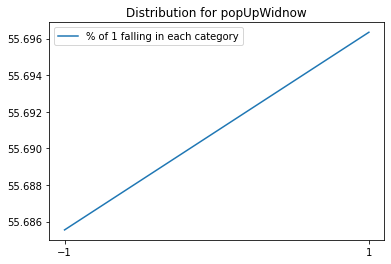

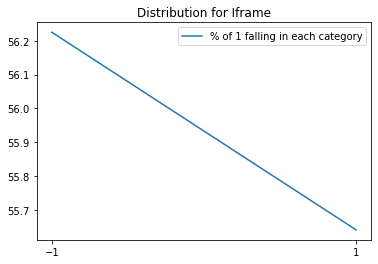

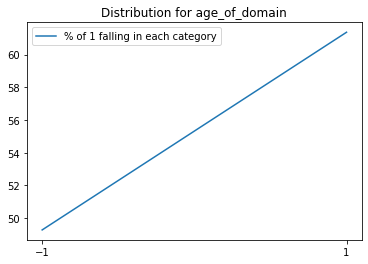

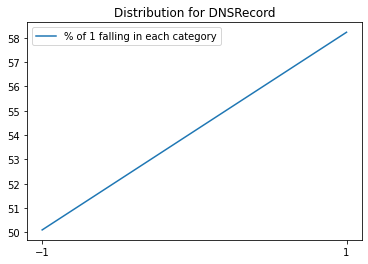

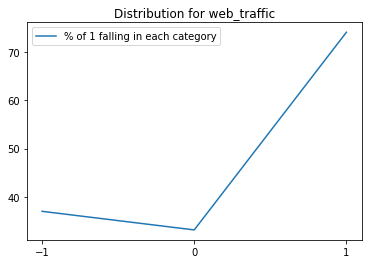

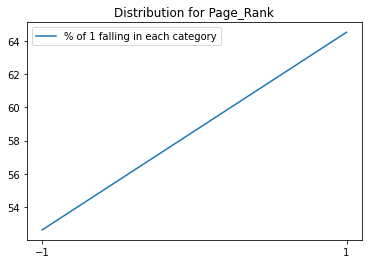

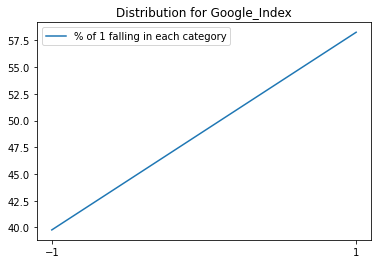

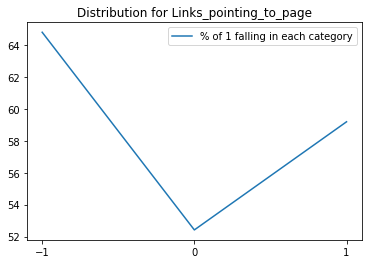

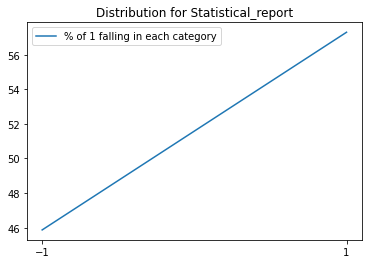

In [8]:
y=df['Result']
X=df.drop(columns=['Result'], axis =1)
for col in X.columns:
    temp = pd.DataFrame()
    index = 0
    for val in df[col].unique():
        denominator = df[df[col] == val].shape[0]
        numerator = df[(df[col] == val) & (df['Result'] == 1)].shape[0]
        perc = numerator * 100 / denominator
        temp.loc[index, 'val'] = val
        temp.loc[index, 'perc'] = perc
        index = index + 1
    temp.sort_values(['val'], inplace = True)
    plt.figure()
    plt.plot(temp['val'], temp['perc'])
    plt.title("Distribution for {}".format(col))
    plt.xticks(df[col].unique())
    plt.legend(['% of 1 falling in each category'])
    plt.show()

In [9]:
X.var()

having_IP_Address              0.901614
URL_Length                     0.586902
Shortining_Service             0.454274
having_At_Symbol               0.509223
double_slash_redirecting       0.450256
Prefix_Suffix                  0.459873
having_Sub_Domain              0.668336
SSLfinal_State                 0.831548
Domain_registeration_length    0.886666
Favicon                        0.604936
port                           0.469669
HTTPS_token                    0.544317
Request_URL                    0.965196
URL_of_Anchor                  0.511422
Links_in_tags                  0.583654
SFH                            0.576298
Submitting_to_email            0.596016
Abnormal_URL                   0.502609
Redirect                       0.102318
on_mouseover                   0.419244
RightClick                     0.164829
popUpWidnow                    0.623812
Iframe                         0.332679
age_of_domain                  0.996340
DNSRecord                      0.857862


In [10]:
corr = df.corr(method='spearman')
c1 = corr.abs()
c1

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,0.053575,0.403461,0.158699,0.397389,0.005257,0.079054,0.075236,0.022739,0.087025,...,0.096882,0.054694,0.010446,0.050733,0.004328,0.091774,0.029153,0.365480,0.019103,0.094160
URL_Length,0.053575,1.000000,0.103928,0.079070,0.078865,0.050731,0.002012,0.043136,0.216549,0.041222,...,0.050802,0.014340,0.175272,0.041113,0.011568,0.180999,0.002192,0.013534,0.071194,0.053332
Shortining_Service,0.403461,0.103928,1.000000,0.104447,0.842796,0.080471,0.041791,0.060377,0.060923,0.006101,...,0.036616,0.016581,0.052596,0.436064,0.051281,0.014591,0.155844,0.222049,0.085461,0.067966
having_At_Symbol,0.158699,0.079070,0.104447,1.000000,0.086960,0.011726,0.058614,0.034112,0.015522,0.304899,...,0.290893,0.284410,0.005499,0.047872,0.030065,0.064735,0.037061,0.011860,0.080357,0.052948
double_slash_redirecting,0.397389,0.078865,0.842796,0.086960,1.000000,0.085590,0.042953,0.035496,0.047464,0.035100,...,0.054463,0.010459,0.050107,0.431409,0.067604,0.003132,0.178415,0.219146,0.070390,0.038608
Prefix_Suffix,0.005257,0.050731,0.080471,0.011726,0.085590,1.000000,0.090581,0.268943,0.096799,0.007504,...,0.014733,0.036904,0.074116,0.016556,0.121126,0.006834,0.067781,0.075783,0.002763,0.348606
having_Sub_Domain,0.079054,0.002012,0.041791,0.058614,0.042953,0.090581,1.000000,0.272061,0.084613,0.016558,...,0.024970,0.010717,0.123921,0.125486,0.000758,0.119105,0.057545,0.007179,0.082809,0.304692
SSLfinal_State,0.075236,0.043136,0.060377,0.034112,0.035496,0.268943,0.272061,1.000000,0.197935,0.013160,...,0.011215,0.005128,0.149757,0.052558,0.278930,0.080435,0.097121,0.006918,0.065305,0.735814
Domain_registeration_length,0.022739,0.216549,0.060923,0.015522,0.047464,0.096799,0.084613,0.197935,1.000000,0.054253,...,0.051410,0.004393,0.062851,0.010477,0.133357,0.059898,0.039766,0.114382,0.002212,0.225789
Favicon,0.087025,0.041222,0.006101,0.304899,0.035100,0.007504,0.016558,0.013160,0.054253,1.000000,...,0.939633,0.627607,0.002628,0.088211,0.045592,0.011699,0.016668,0.139265,0.300917,0.000280


[0.00922831 0.00749399 0.00399109 0.00413118 0.0014925  0.03019438
 0.02860686 0.47819275 0.01178513 0.00273342 0.00097268 0.00456903
 0.01299236 0.24835652 0.0326353  0.01078407 0.00508854 0.00236797
 0.00451521 0.00357884 0.00175213 0.00269909 0.00176383 0.01143958
 0.00803878 0.03157167 0.00882984 0.00997884 0.01677482 0.0034413 ]


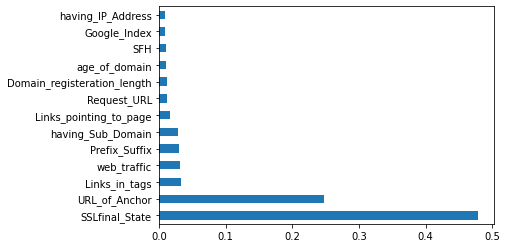

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

model=ExtraTreesRegressor()
model.fit(X,y)
ExtraTreesRegressor(random_state=101)
print(model.feature_importances_)
pd.Series(model.feature_importances_, index = X.columns).nlargest(13).plot(kind = 'barh')
plt.show()
X.columns

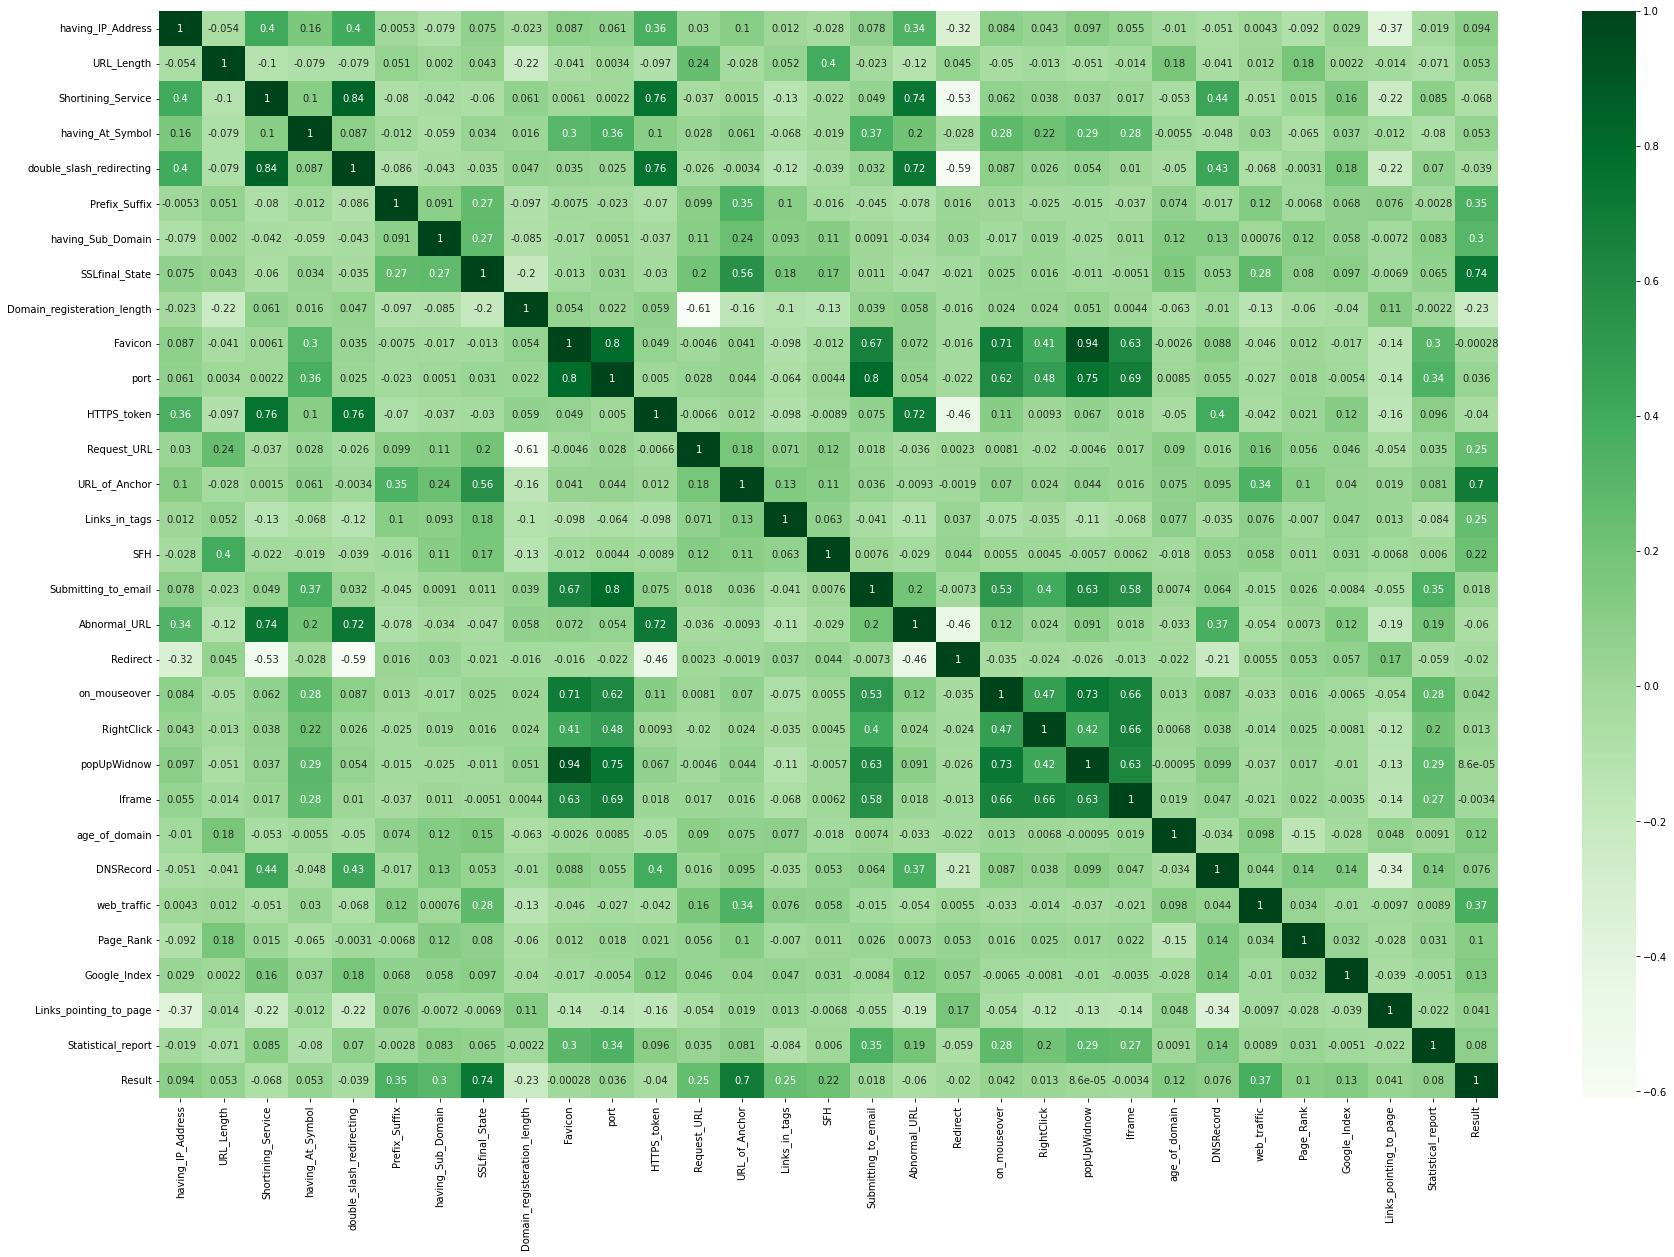

In [12]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [13]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold : # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                
    return col_corr

In [14]:
corr_features = correlation(X, 0.8)
len(set(corr_features))
corr_features

{'double_slash_redirecting', 'popUpWidnow', 'port'}

In [15]:
df.drop(columns=corr_features,axis=1,inplace=True)


Note: Check the target column is imbalanced or not

<AxesSubplot:ylabel='Result'>

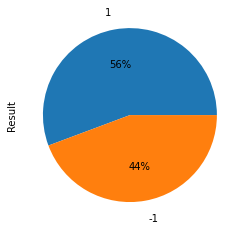

In [17]:
df['Result'].value_counts().head(4).plot.pie(autopct='%1.0f%%',labeldistance=1.2)

In [ ]:
#The target feature is not imbalanced dataset